In [17]:
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

#define constant
theta  = 1.074   #1.074 is magic angle         #degree
omega  = 0.110          #mev
d      = 1.420          #angstrom, whatever is ok.
hv     = 1.5*d*2.8     #meV*angstrom, Fermi velocity for SLG
N      = 11              #truncate range
valley = -1            #+1 for K, -1 for K'


#tune parameters
theta  = theta/180.0*np.pi  
alpha  = 0.005414/np.sin(theta/2)            #obtained after computing w/(vf*k_theta)
hv1    = hv*(1-3*alpha**2)/(1+6*alpha**2)    #renormalized fermi velocity
ei120  = cos(2*pi/3) + valley*1j*sin(2*pi/3)
ei240  = cos(2*pi/3) - valley*1j*sin(2*pi/3)

ktheta = 8*np.pi*sin(theta/2)/3/sqrt(3)/d
qb     = ktheta*array([0, 1])
K1     = ktheta*array([sqrt(3)/2,0.5])    #Changed
K2     = ktheta*array([-sqrt(3)/2,0.5])

Tqb    = omega*np.array([[1,1], [1,1]], dtype=complex)
Tqtr   = omega*np.array([[ei120, 1], [ei240, ei120]], dtype=complex)
Tqtl   = omega*np.array([[ei240, 1], [ei120, ei240]], dtype=complex)
TqbD   = np.array(np.matrix(Tqb).H)
TqtrD  = np.array(np.matrix(Tqtr).H)
TqtlD  = np.array(np.matrix(Tqtl).H)

def Hamiltonian(N,B):
    
    H = array(zeros((8*N, 8*N)), dtype=complex)
    
    kx=(0.5*np.sqrt(2*e*B)*(destroy(N)+destroy(N).dag()))
    ky=(0.5j*np.sqrt(2*e*B)*(destroy(N)-destroy(N).dag()))
    
    qx=kx*np.cos(theta/2)-ky*np.sin(theta/2)
    qy=kx*np.sin(theta/2)+ky*np.cos(theta/2)
    qx1=(kx+qb[0])*np.cos(theta/2)+(ky+qb[1])*np.sin(theta/2)
    qy1=-(kx+qb[0])*np.sin(theta/2)+(ky+qb[1])*np.cos(theta/2)
    qx2=(kx+K1[0])*np.cos(theta/2)+(ky+K1[1])*np.sin(theta/2)
    qy2=-(kx+K1[0])*np.sin(theta/2)+(ky+K1[1])*np.cos(theta/2)
    qx3=(kx+K2[0])*np.cos(theta/2)+(ky+K2[1])*np.sin(theta/2)
    qy3=-(kx+K2[0])*np.sin(theta/2)+(ky+K2[1])*np.cos(theta/2)
    
    upper=Qobj([[0,1],[0,0]])
    lower=Qobj([[0,0],[1,0]])
    
    H11=valley*hv*(tensor(upper,qx+1j*qy,)+tensor(lower,qx-1j*qy)).full()
    H22=valley*hv*(tensor(upper,qx1+1j*qy1,)+tensor(lower,qx1-1j*qy1)).full()
    H33=valley*hv*(tensor(upper,qx2+1j*qy2)+tensor(lower,qx2-1j*qy2)).full()
    H44=valley*hv*(tensor(upper,qx3+1j*qy3)+tensor(lower,qx3-1j*qy3)).full()

    H[0:2*N,0:2*N]=H11
    H[2*N:4*N,2*N:4*N]=H22
    H[4*N:6*N,4*N:6*N]=H33
    H[6*N:8*N,6*N:8*N]=H44
    
    
    H[0:2*N,2*N:4*N]=tensor(identity(N),Qobj(Tqb)).full()
    H[0:2*N,4*N:6*N]=tensor(identity(N),Qobj(Tqtr)).full()
    H[0:2*N,6*N:8*N]=tensor(identity(N),Qobj(Tqtl)).full()
    H[2*N:4*N,0:2*N]=tensor(identity(N),Qobj(TqbD)).full()
    H[4*N:6*N,0:2*N]=tensor(identity(N),Qobj(TqtrD)).full()
    H[6*N:8*N,0:2*N]=tensor(identity(N),Qobj(TqtlD)).full()
    
    eigenvalue,featurevector=np.linalg.eig(H)
    eig_vals_sorted = np.sort(eigenvalue)
    return eig_vals_sorted


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


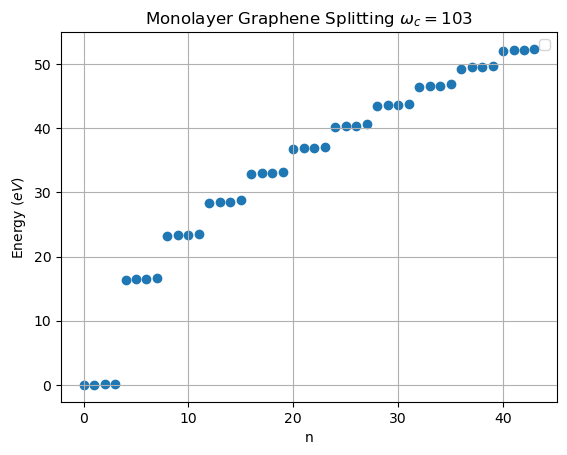

In [19]:
wc=10             #cylcotron frequency tunable
B=wc**2/(2*hv**2)

#eigenvalue=[]

eigenvalue=sorted(Hamiltonian(N,B))


positive_eigenvalue=[a for a in eigenvalue if a>=0]

X_range=np.arange(0,len(positive_eigenvalue))



plt.scatter(X_range,positive_eigenvalue)
plt.xlabel('n')
plt.ylabel('Energy $(eV)$')
plt.title(f'Monolayer Graphene Splitting $\omega_c=103$')
plt.legend()
plt.grid(True)
plt.show()